## Predicting Graduate Admissions

The dataset contains records of 500 students and their chance of admit.

The following features are given in the dataset:

1. GRE Score (out of 340) - The student's GRE Score


2. TOEFL Score (out of 120) - The student's TOEFL score


3. University rating (1 to 5) - The student's undergrad university rating


4. SOP (1 to 5) - The student's SOP rating


5. LOR (1 to 5) - The student's LOR rating


6. CGPA (out of 10) - The student's undergrad CGPA


7. Research (0 or 1) - If the student has any research experience or not


8. Chance of Admit (0 to 1) - The probability of the student getting an admit

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')
data.drop('Serial No.', axis=1, inplace=True)

In [3]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


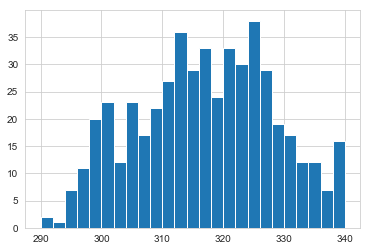

In [5]:
plt.hist(data['GRE Score'], bins=25)
plt.show()

The majority of students score between 310 and 330. This is pretty common since anything lower than 310 reduces the chances of the student getting an admit and anything above 330 will greatly increase the chances of getting an admit.

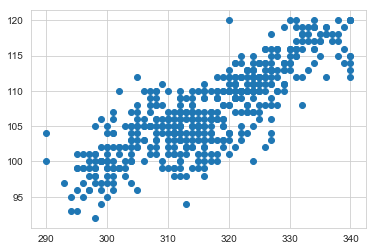

In [6]:
plt.scatter(data['GRE Score'], data['TOEFL Score'])
plt.show()

The general trend is the student getting better score in GRE also tend to perform better in TOEFL

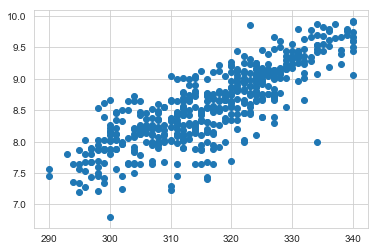

In [7]:
plt.scatter(data['GRE Score'], data['CGPA'])
plt.show()

Students with higher CGPA have a higher score in GRE.

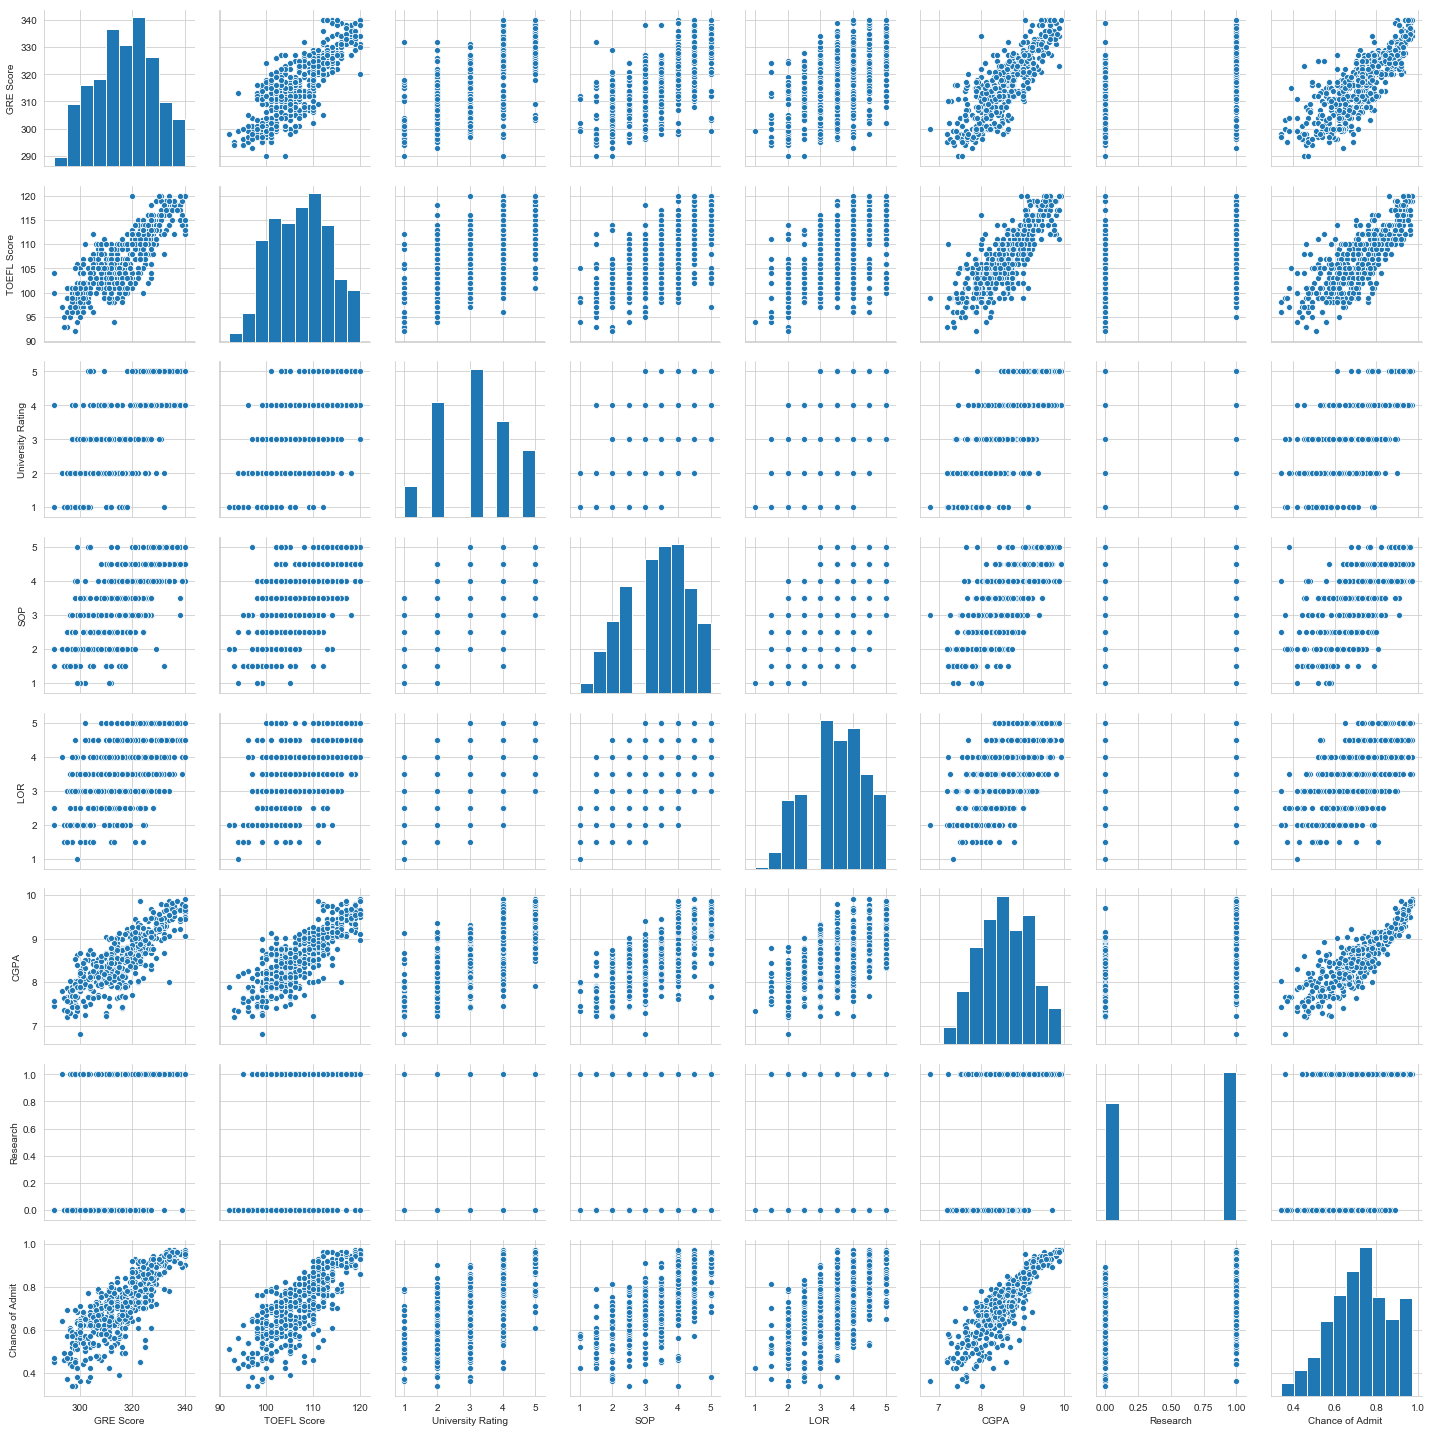

In [8]:
sns.pairplot(data)

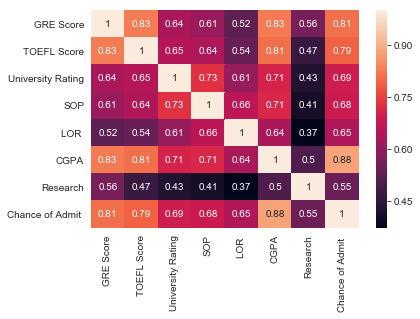

In [9]:
corr = data.corr()
sns.heatmap(corr, annot=True)

From the above two graphs, we can see that there is a high correlation between CGPA and the chances of getting an admit. Intrestingly, having researh experience is not that important.

## Modeling

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [11]:
X = data.drop('Chance of Admit ', axis=1).copy()
y = data['Chance of Admit '].copy()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

- Using Linear regression

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
lr_pred = lr.predict(X_test)
r2_score(y_test, lr_pred)

0.825630603991949

- Using Random forest

In [16]:
rfr = RandomForestRegressor(n_estimators=100)

In [17]:
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [18]:
rfr_pred = rfr.predict(X_test)
r2_score(y_test, rfr_pred)

0.8117020207426691

Checking the importances of the different parameters

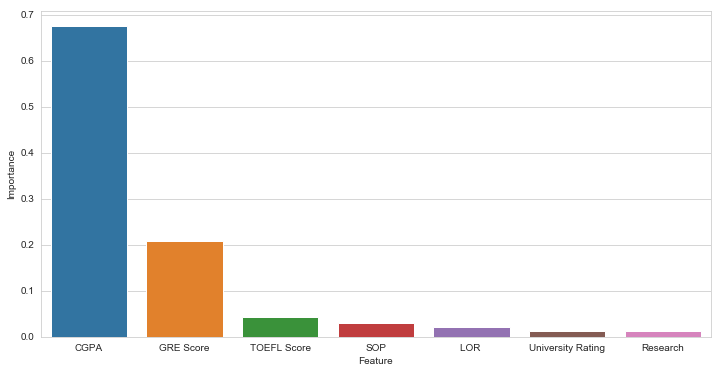

In [19]:
imp = pd.DataFrame(sorted(zip(rfr.feature_importances_, X_train.columns), reverse=True), columns=['Importance', 'Feature'])
plt.figure(figsize=(12,6))
sns.barplot(imp['Feature'], imp['Importance'])

The model must be tuned so that the model does not depend too much on just one feature

In [20]:
scalerX = MinMaxScaler(feature_range=(0, 1))
X_train[X_train.columns] = scalerX.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scalerX.transform(X_test[X_test.columns])

C:\Users\Smit\Miniconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Smit\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Smit\Miniconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Smit\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWi

In [21]:
rfr = RandomForestRegressor(n_jobs = -1)
param_grid = {'n_estimators': [200, 500, 800, 1000], 
                    'max_depth': [4, 5, 6, 7], 
                    'min_samples_split': [2, 3, 4, 5],
                    'max_features': [1,2,3,4,5,6,7]}
rfr_grid = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3,n_jobs = -1)
rfr_grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [200, 500, 800, 1000], 'max_depth': [4, 5, 6, 7], 'min_samples_split': [2, 3, 4, 5], 'max_features': [1, 2, 3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [22]:
rfr_grid.best_params_

{'max_depth': 5,
 'max_features': 3,
 'min_samples_split': 3,
 'n_estimators': 800}

In [23]:
rfr.set_params(**rfr_grid.best_params_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=800, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [24]:
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=800, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [25]:
rfr_pred = rfr.predict(X_test)
r2_score(y_test, rfr_pred)

0.820496705821748

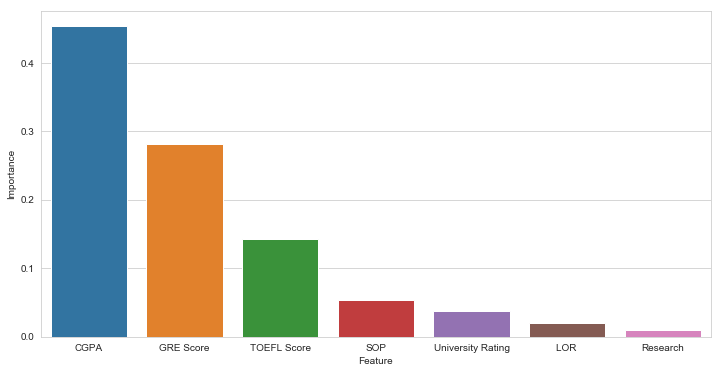

In [26]:
imp = pd.DataFrame(sorted(zip(rfr.feature_importances_, X_train.columns), reverse=True), columns=['Importance', 'Feature'])
plt.figure(figsize=(12,6))
sns.barplot(imp['Feature'], imp['Importance'])

## Conclusion

It is interesting to see that the prebability of getting an admit depends majorly on the student's CGPA, GRE and TOEFL scores. SOP and LOR have relatively lower importance and the research experience has the lowest importance of all.